# Functions

This notebook shows how to define functions with one (or several) inputs and outputs. It also shows how to use to dot (.) syntax to apply a function to each element of an array.

## Loading Packages

In [1]:
using Dates, Roots
             
include("printmat.jl")

printlnPs (generic function with 2 methods)

In [2]:
using Plots

backend = "gr"              #"gr" (default), "pyplot" 

if backend == "pyplot"
    pyplot(size=(600,400))
else    
    gr(size=(480,320))
    default(fmt = :svg)
end

# Functions with One Output

## The Basic Approach

The basic approach to define a function with the name `fn` is
```
function fn(x,b)
    ...(some code)
    return y
end    
``` 

Once you have defined a function, you can use it (call on it) by, for instance, `y1 = fn(2,1)`. This will generate a `y1` variable (not a `y` variable) in the workspace. Inside the function, `x` is then 2 and `b` is 1. Clearly, if `x1=2 and b1=1`, you get the same result by calling as `y1 = fn(x1,b1)`.

In [3]:
function fn1(x,b)                   #x and b are the inputs
    c = 0.5                         #c is only "seen" inside the function   
    y = b*(x-1.1)^2 - c
    return y                        #this is the output 
end

y1 = fn1(2,1)
printlnPs("result from fn1(2,1): ",y1)

result from fn1(2,1):      0.310


## Default Values for the Inputs

You can change the first line of the function to specify default values as 
```
function fn(x,b=1)
```

In this case you can call on the function as `fn(x)` and the value of `b` will default to 1. (Clearly, inputs with default values must be towards the end of the list of inputs.)

In [4]:
function fn2(x,b=1)                 #b=1 is the default in case we call as fn2(x)
    y = b*(x-1.1)^2 - 0.5
    return y
end

printlnPs("result from fn2(2,1) and fn2(2): ",fn2(2,1),fn2(2))

result from fn2(2,1) and fn2(2):      0.310     0.310


## Elementwise Evaluation

To apply the function to each element of arrays `x` and `b`, use the dot syntax: 
```
y = fn.(x,b)
```
This calculates `fn(x[i],b[i])` for each pair `(x[i],b[i])`.

Instead, with `fn.(x,2)`, you calculate `fn(x[i],2)` for each element `x[i]`.

In [5]:
x1 = [1,1.5]
b1 = [2,2]

println("\nresult from the function fn2.(x1,2): ")
printmat(fn2.(x1,2))

println("\nresult from the function fn2.(x1,b1): ")
printmat(fn2.(x1,b1))


result from the function fn2.(x1,2): 
    -0.480
    -0.180


result from the function fn2.(x1,b1): 
    -0.480
    -0.180



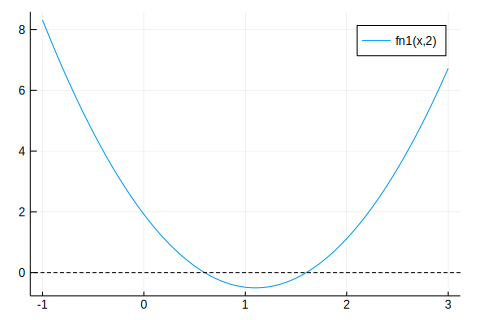

In [6]:
x2 = -1:0.01:3                        

p1 = plot(x2,fn1.(x2,2),label="fn1(x,2)")           #plotting the function
plot!([0],linetype=:hline,linecolor=:black,line=(:dash,1),label="")

## Short Form

We can also use short forms of a function as in the cell below. 

The first version (`fn3`) is just a single expression. It could span several lines. The second version (`fn3b`) is a sequence of expressions (a "compound expression") separated by semicolon (;). The last expression is the function output. 

In [7]:
fn3(x,b) = b*(x-1.1)^2 - 0.5          #short form of a function

fn3b(x,b) = (c = 0.5;b*(x-1.1)^2 - c)  #this works too. Notice the ;
                                                     
println("result from the function fn3(1.5,1) and fn3b(1.5,1): ")
printmat([fn3(1.5,1) fn3b(1.5,1)])

result from the function fn3(1.5,1) and fn3b(1.5,1): 
    -0.340    -0.340



## Explicit Names of the Inputs: Keyword Arguments

You can also define functions that take *keyword arguments* like in 
```
fn(x;b,c)
``` 
Notice the semi-colon (;). You can also specify default values as `fn(x;b=1,c=0.5)`

In this case, you *call* on the function by `fn(x,c=3,b=2)` (or just `fn(x)` if you want to use the default values). This helps remembering/interpreting what the arguments represent. When calling on the function, you can pass the keyword arguments in any order and you can use comma (,) instead of semi-colon (;).

In [8]:
function fn4(x;b=1,c=0.5)
    y = b*(x-1.1)^2 - c
    return y
end

printlnPs("result from fn4(1,c=3,b=2): ",fn4(1,c=3,b=2))  

result from fn4(1,c=3,b=2):     -2.980


## An "Anonymous" Function

The expression 
```
x->2*(x-1.1)^2 - 0.5
```
creates an anonymous function (a function without a name). 

This approach is often useful as an input to another function. For instance, the next cell uses
```
x->fn1(x,2)
```
This creates an anonymous function with only one input (`x`), which is what the root finding routine ```find_zero()``` wants.

In [9]:
xRoot = find_zero(x->fn1(x,2),(-1,1))         #finding a root of a function in     
                                           #the interval [-1,1]
printlnPs("A root at: ",xRoot,", compare with the graph above.")

A root at:      0.600, compare with the graph above.


# Functions with Several Outputs

## Basic Approach

A function can produce a "tuple" like `(y1,y2,y3)` as output.

In case you only want the first two outputs, call as `(y1,y2,) = fn(x)`.

Instead, if you only want the 2nd and third outputs, call as `(_,y2,y3) = fn(x)`

You can also extract the second output as `y2 = fn(x)[2]`

In [10]:
function fn11(x,b=1)                 
    y1 = b*(x-1.1)^2 - 0.5
    y2 = b*x
    y3 = 3
    return y1, y2, y3
end

(y1,y2,) = fn11(1,2)
printlnPs("The first 2 outputs from the function fn11(1,2): ",y1,y2)

y2 = fn11(1,2)[2]         #to grab just the second output from the function
printlnPs("The result from calling fn11(1,2)[2]: ",y2)

The first 2 outputs from the function fn11(1,2):     -0.480         2
The result from calling fn11(1,2)[2]:          2


## Several Outputs 2: Named Tuples and Dictionaries


Instead of returning several values, it might be easier to combine them into either a "named tuple" or a dictionary and then exporting that.

In [11]:
function fn12(x,b=1)                 
    y1 = b*(x-1.1)^2 - 0.5
    y2 = b*x
    y3 = 3
    y  = (a=y1,b=y2,c=y3)                     #named tuple
    return y                                   
end

y1 = fn12(1,2)
println("from fn12(1,2): ")      
printlnPs(y1.a,y1.b)                          #y1.a to get "element" a of the output y1

from fn12(1,2): 
    -0.480         2


In [12]:
function fn13(x,b=1)                 
    y1 = b*(x-1.1)^2 - 0.5
    y2 = b*x
    y3 = 3
    y  = Dict("a"=>y1,"b"=>y2,"c"=>y3)                     #dictionary
    return y
end

y1 = fn13(1,2)
println("from the function fn13(1,2): ")
printlnPs(y1["a"],y1["b"])                  #y1["a"] to get "element" a of the output y1                          

from the function fn13(1,2): 
    -0.480         2


## Several Outputs 3: Elementwise Evaluation (extra)

...can be tricky, because you get an array (same dimension as the input) of tuples instead of a tuple of arrays (which is probably what you want).

One way around this is to reshuffle the output to get a tuple of arrays.

Alternatively, you also loop over the function calls or to write the function so that it can directly handle array inputs (without the dot). This is done in `fn14()`.

In [13]:
y = fn11.([1,1.5],2)
println("type and size of y: ",typeof(y)," ",size(y) )

(y1,y2,y3) = ntuple(i->getindex.(y,i),3)    #split up into 3 vectors

println("\nprinting the vectors y1 and y2")
printmat([y1 y2])

type and size of y: Array{Tuple{Float64,Float64,Int64},1} (2,)

printing the vectors y1 and y2
    -0.480     2.000
    -0.180     3.000



In [14]:
function fn14(x,b=1)                 #x can be an array
    y1 = b*(x.-1.1).^2 .- 0.5
    y2 = b*x
    y3 = 3
    return y1, y2, y3
end

(y1,y2,) = fn14(x1,2)                                  #function written to handle arrays
println("result from the function fn14(x1,2): ")
printmat([y1 y2])

result from the function fn14(x1,2): 
    -0.480     2.000
    -0.180     3.000



# Documenting Your Function 

To use Julia's help function (`? FunctionName`), put the documentation in triple quotes, just above the function defintion. (No empty lines between the last tripe quote and the start of the function.) The cell below illustrates a simple case.

In [15]:
"""
    fn101(x,b=1)

Calculate `b*(x-1.1)^2 - 0.5`.

# Arguments
- `x::Number`:    an important number
- `b::Number`:    another number

"""
function fn101(x,b=1)       
    y = b*(x-1.1)^2 - 0.5
    return y
end

fn101

In [16]:
? fn101

search: fn101



```
fn101(x,b=1)
```

Calculate `b*(x-1.1)^2 - 0.5`.

# Arguments

  * `x::Number`:    an important number
  * `b::Number`:    another number
